# Dimensionality Reduction (giảm chiều dữ liệu)

Các feature vectors trong bài toán thực tế có thể có số chiều, số lượng các điểm dữ liệu rất lớn. => Giảm số chiều
##### => đi tìm một hàm số, lấy đầu vào là một điểm dữ liệu ban đầu:  x ∈ R$^D$ với D rất lớn, và tạo ra một điểm dữ liệu mới z ∈ R$^K$ có số chiều K<D
## PCA(Principal Component Analysis): Phân tích thành phần chính

* Chỉ giữ lại K phần tử quan trọng nhất => không phải là tốt nhất vì chưa xđ được thành phần nào là quan trọng hơn
* PCA sẽ tìm một HỆ TRỰC CHUẨN để làm CƠ SỞ MỚI.

<img src='https://machinelearningcoban.com/assets/27_pca/pca_var.png' style="width:400px;"/>

* Không gian ban đầu: vector cơ sở màu đen e1,e2, phương sai theo mỗi chiều dữ liệu: σ1 và σ2 đều lớn
* Không gian mới    : vector cơ sở màu đỏ u1,u1, phương sai theo chiều thứ hai ${\hat{σ}}$<sub>2</sub> rất nhỏ so với ${\hat{σ}}$<sub>1</sub>

→ Khi chiếu dữ liệu theo trục u1 lên trục u2 ta được các điểm rất gần nhau và gần với kì vọng theo chiều đó

→ Vì vậy, ta có thể thay thế tọa độ theo chiều u2 = 0 (kiểu d = u1(Ox) thì y(u2) = 0)

Dữ liệu có phương sai càng nhỏ theo một chiều nào đó => xấp xỉ chiều đó bằng hằng số, sai số càng nhỏ
##### Tổng phương sai theo mọi chiều trong hệ cơ sở không đổi
##### Vậy PCA là phương pháp tìm một phép xoay để làm giảm số chiều dữ liệu (xấp xỉ chiều đó là hằng số), giữ lại tổng phương sai còn lại ( ${\hat{σ}}$<sub>2</sub>) là lớn nhất

## Các bước thực hiện PCA

<img src='https://machinelearningcoban.com/assets/27_pca/pca_procedure.png' style="width:700px;"/>

### Một số định nghĩa: 
#### N: số điểm dữ liệu được biểu diễn bởi các vector cột: x1,x2,....xN
#### Hiệp phương sai là khải niệm trong xstk dùng để đo lường mức độ biến đổi cùng nhau của 2 biến trong một tập dữ liệu. Có giá trị dương khi sự biến đổi của 2 biến có xu hướng cùng tăng hoặc cùng giảm. Ngc lại, âm khi sự biến đổi của một biến ngược so với sự  biến đổi của biến khác
#### Ma trận hiệp phương sai: 
* là một ma trận đối xứng, nửa xác định dương
* mọi phần tử trên đường chéo chính >0 và chính là phương sai của các chiều dữ liệu
* các phần từ ngoài đường chéo $s_{ij}$ thể hiện sự tương quan giữa các thành phần thứ i và thứ j của dữ liệu, gọi là hiệp phương sai. 
* Các giá trị hiệp phương sai này có thể âm, dương hoặc =0, nếu = 0 thì 2 thành phần i,j không tương quan(uncorrelated)
* Nếu ma trận hps này là mt đường chéo => dữ liệu hoàn toàn không tương quan giữa các chiều

### Find mean vector (Tính vector kì vọng của toàn bộ dữ liệu)

<font size="10">x̄ = $\frac{1}{N} \sum_{n=1}^N x_i $</font>

### Subtract mean ( Mỗi điểm dữ liệu - vector kì vọng):
<font size="10"> ${\hat X}$<sub>n</sub> = x<sub>n</sub> - x̄ </font>

### Compute covariance matrix (Tính ma trận hiệp phương sai)
<font size="10"> S = $\frac{1}{N} {\hat X} {\hat X}^T$ </font>

In [144]:
#hàm tính covariance matrix:
import numpy as np
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
cov_mat = np.cov(x.T)
cov_mat

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

In [151]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [153]:
df = np.array([iris_df['sepal_length'],iris_df['sepal_width'],iris_df['petal_length'],iris_df['petal_width']])
df.T

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [155]:
cov_mat = np.cov(df)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

### Compute eigenvalues and eigenvector (tính giá trị riêng và vector riêng )

* Giải phương trình đặc trưng  A.$\mathbf{v}$ = $\lambda$.$\mathbf{v}$

In [156]:
# sử dụng numpy, trả về tuple gt riêng và vector riêng tương ứng
values,vectors = np.linalg.eig(cov_mat)
values,vectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

* Sắp xếp theo thứ tự giảm dần của trị riêng

In [157]:
s_values = np.sort(values)[::-1] #sắp xếp giảm dần
s_values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [158]:
s_vectors = vectors[:,np.argsort(values)[::-1]] # lấy chỉ số sắp xếp giảm dần
s_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

### Pick K eigenvector with highest eigenvalues ( K là số chiều muốn giảm về)

In [159]:
mat_K = s_vectors[:,:2]
mat_K

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

### Project data to selected eigenvectors (Chiếu dữ liệu ban đầu đã chuẩn hóa ${\hat X}$ xuống không gian con vừa tìm được)

* chuẩn hóa data ban đầu

In [193]:
# normalized_data = (data_matrix - mean)/std
norm_data = (df.T-np.mean(df.T,axis = 0))/ np.std(df.T,axis = 0)
norm_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [161]:
reduced_data = np.dot(norm_data,mat_K)
reduced_data

array([[-2.03106506, -0.48431026],
       [-2.0213579 ,  0.51520868],
       [-2.19653936,  0.32830794],
       [-2.12348909,  0.59565432],
       [-2.09431031, -0.57283359],
       [-1.73712933, -1.34587222],
       [-2.18338808,  0.09149359],
       [-2.00670574, -0.22681794],
       [-2.22084331,  1.08107679],
       [-2.03928615,  0.3470462 ],
       [-1.88992239, -1.04929019],
       [-2.04559167, -0.05784895],
       [-2.11230873,  0.58483041],
       [-2.47732381,  0.95305556],
       [-1.91921191, -1.90132462],
       [-1.80042995, -2.44465673],
       [-1.93189314, -1.38528844],
       [-1.98390267, -0.47437452],
       [-1.63346958, -1.42639954],
       [-1.99358214, -0.96876287],
       [-1.73417006, -0.52533968],
       [-1.92696295, -0.79074634],
       [-2.4642279 , -0.29401996],
       [-1.70459141, -0.08877929],
       [-1.89951882, -0.02828678],
       [-1.88018755,  0.45535933],
       [-1.86369001, -0.19709242],
       [-1.93858566, -0.55401366],
       [-1.96781981,

In [171]:
reduced_data.T

array([[-2.03106506, -2.0213579 , -2.19653936, -2.12348909, -2.09431031,
        -1.73712933, -2.18338808, -2.00670574, -2.22084331, -2.03928615,
        -1.88992239, -2.04559167, -2.11230873, -2.47732381, -1.91921191,
        -1.80042995, -1.93189314, -1.98390267, -1.63346958, -1.99358214,
        -1.73417006, -1.92696295, -2.4642279 , -1.70459141, -1.89951882,
        -1.88018755, -1.86369001, -1.93858566, -1.96781981, -2.0504665 ,
        -1.98722125, -1.73722719, -2.10248891, -1.99210895, -1.99212376,
        -2.11386498, -1.90460224, -2.18526115, -2.28899107, -1.9629173 ,
        -2.07638207, -2.06184257, -2.32790469, -1.78882204, -1.75165594,
        -2.01798395, -1.99205358, -2.19163685, -1.93371084, -2.03593988,
         1.03203592,  0.71908574,  1.15224858,  0.16232149,  0.88939238,
         0.3960691 ,  0.80038479, -0.60218982,  0.81939923, -0.04839964,
        -0.38319223,  0.39298429,  0.25923335,  0.69631036, -0.10539473,
         0.77405454,  0.40769181,  0.12306337,  0.8

In [165]:
import seaborn as sns
import pandas as pd

In [167]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [174]:
iris_df['d1st'] = reduced_data.T[0]
iris_df['d2nd'] = reduced_data.T[1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,d1st,d2nd
0,5.1,3.5,1.4,0.2,setosa,-2.031065,-0.484310
1,4.9,3.0,1.4,0.2,setosa,-2.021358,0.515209
2,4.7,3.2,1.3,0.2,setosa,-2.196539,0.328308
3,4.6,3.1,1.5,0.2,setosa,-2.123489,0.595654
4,5.0,3.6,1.4,0.2,setosa,-2.094310,-0.572834
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.607500,-0.333721
146,6.3,2.5,5.0,1.9,virginica,1.243599,0.765462
147,6.5,3.0,5.2,2.0,virginica,1.378436,-0.204413
148,6.2,3.4,5.4,2.3,virginica,1.408113,-0.588549


<AxesSubplot: xlabel='d1st', ylabel='d2nd'>

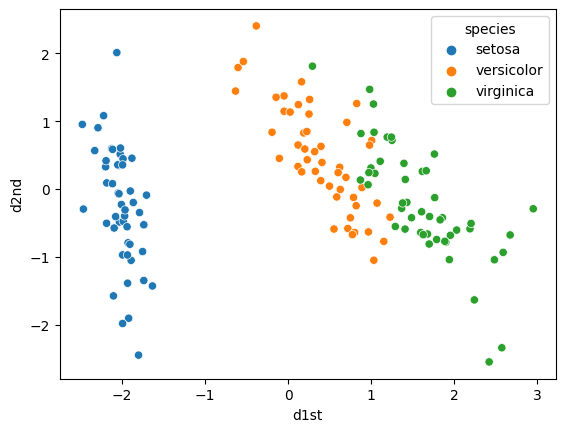

In [175]:
sns.scatterplot(x='d1st',y='d2nd',hue = 'species',data=iris_df)

# PCA trong sklearn

In [122]:
from sklearn.decomposition import PCA

In [185]:
#n_components là số thành phần chính muốn giữ lại 
#whiten: cho phép chuẩn hóa dữ liệu sau khi giảm chiều hay không.

In [197]:
pca = PCA(n_components=2, whiten=False)
pca_data = pca.fit_transform(norm_data)

pca_data

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [198]:
pca_data.T

array([[-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
        -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
        -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
        -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
        -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
        -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
        -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
        -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
        -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
        -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
         1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
         0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
        -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
         0.87540719,  0.35025167,  0.15881005,  1.2

In [199]:
iris_df['d1'] = pca_data.T[0]
iris_df['d2'] = pca_data.T[1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,d1st,d2nd,d1,d2
0,5.1,3.5,1.4,0.2,setosa,-2.031065,-0.484310,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.021358,0.515209,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.196539,0.328308,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.123489,0.595654,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.094310,-0.572834,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.607500,-0.333721,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.243599,0.765462,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.378436,-0.204413,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.408113,-0.588549,1.372788,1.011254


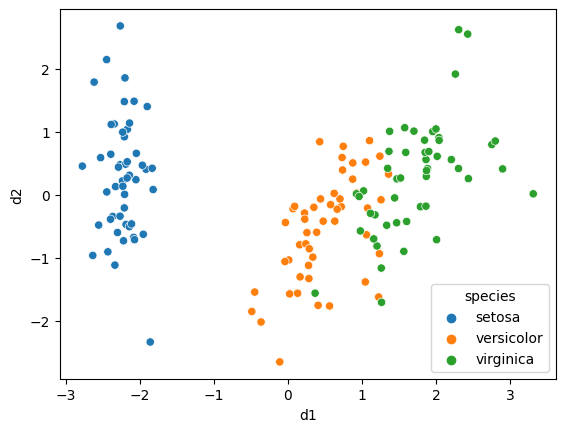

In [189]:
sns.scatterplot(x='d1',y='d2',hue = 'species',data=iris_df);

## Sự khác nhau là do PCA trong sklearn sử dụng SVD(Singular Value Decomposition): Phân rã giá trị đơn. Có 2 cách SVD trong PCA của sklearn là:
* Full SVD (standard SVD): Phân rã ma trận hiệp phương sai thành 3 ma trận:'U','S','Vt'. Các thành phần chính là các cột của ma trận Vt, giá trị riêng tương ứng là phần tử trên đường chéo chính của ma trận 'S'
* Randomize SVD: Phương pháp gần đúng nhằm làm giảm thời gian tính toán. PP này sử dụng kĩ thuật *Monte Carlo* để ước tính các thành phần chính và giá trị riêng.
-> sử dụng phương thức fit_transform là thực hiện theo cách Full SVD.
        

# Công dụng của PCA

* Giảm chiều dữ liệu: Kết quả của PCA là số lượng nhỏ các thành phần chính thay vì toàn bộ số đặc trưng ban đầu. giúp giảm chiều dữ liệu, tăng tốc độ tính toán và làm giảm tác động của nhiễu
* Biểu diễn dữ liệu: tối đa tổng phương sai được giữ lại đồng nghĩa với lượng thông tin được giữ lại. Với phương sai càng lớn tức là dữ liệu có độ phân tán cao, thể hiện lượng thông tin càng lớn.
* Nén dữ liệu: Khi giữ lại một lượng nhỏ tp chính ta có thể nén giữ liệu ban đầu mà vẫn giữ lại phần lớn thông tin quan trọng,hữu ích khi lưu trữ hoặc truyền dữ liệu một cách hiệu quả
* Phân tích cụm dữ liệu: Dựa trên dữ liệu đã giảm chiều, ta có thể thực hiện *phân tích cụm* để tìm cách phân chia dữ liệu thành các nhóm tương đồng.

# Correlation Matrix


là ma trận tương quan: chưa các hệ số tương quan giữa các CẶP biến trong tập dữ liệu.Mỗi phần từ (i,j) của ma trận tương quan chứa hệ số tương quan giữa biến i và biến j
   ##### hệ số tương quan: nằm trong khoảng -1 tới 1
    * -1: tương quan hoàn toàn âm: khi biến này tăng, biến còn lại giảm một cách đáng kể theo mẫu cố định. VD: nhiệt độ càng tăng, số người ra đường càng giảm
    * 0: Hai biến không tương quan, việc thay đổi giá trị một biến không ảnh hưởng đáng kể đến giá trị của biến còn lại. VD: Chiều cao của con người với số tiền điện nước hàng tháng.
    * 1: Hai biến hoàn toàn tương quan: khi biến này tăng, biến còn lại cũng tăng một cách đáng kể theo mẫu cố định. VD: Số giờ học tập và số điểm của môn học đó.

##### Công thức tính hệ số tương quan Pearson:
<font size ="8">$ r = \frac{ \sum (X_i-\overline{X}).(Y_i-\overline{Y})}{\sqrt{\sum (X_i-\overline{X})^2.(Y_i-\overline{Y})^2}}$</font>

$\overline X $ là mean X

In [210]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,d1st,d2nd,d1,d2
0,5.1,3.5,1.4,0.2,setosa,-2.031065,-0.484310,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.021358,0.515209,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.196539,0.328308,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.123489,0.595654,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.094310,-0.572834,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.607500,-0.333721,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.243599,0.765462,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.378436,-0.204413,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.408113,-0.588549,1.372788,1.011254


In [245]:
# Hàm corr trong pandas
pearson_method = iris_df.iloc[:,:4].corr(method='pearson') # mặc định là pearson
pearson_method

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [246]:
kendall_method = iris_df.iloc[:,:4].corr(method='kendall')

In [247]:
spearman_method = iris_df.iloc[:,:4].corr(method='spearman')

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

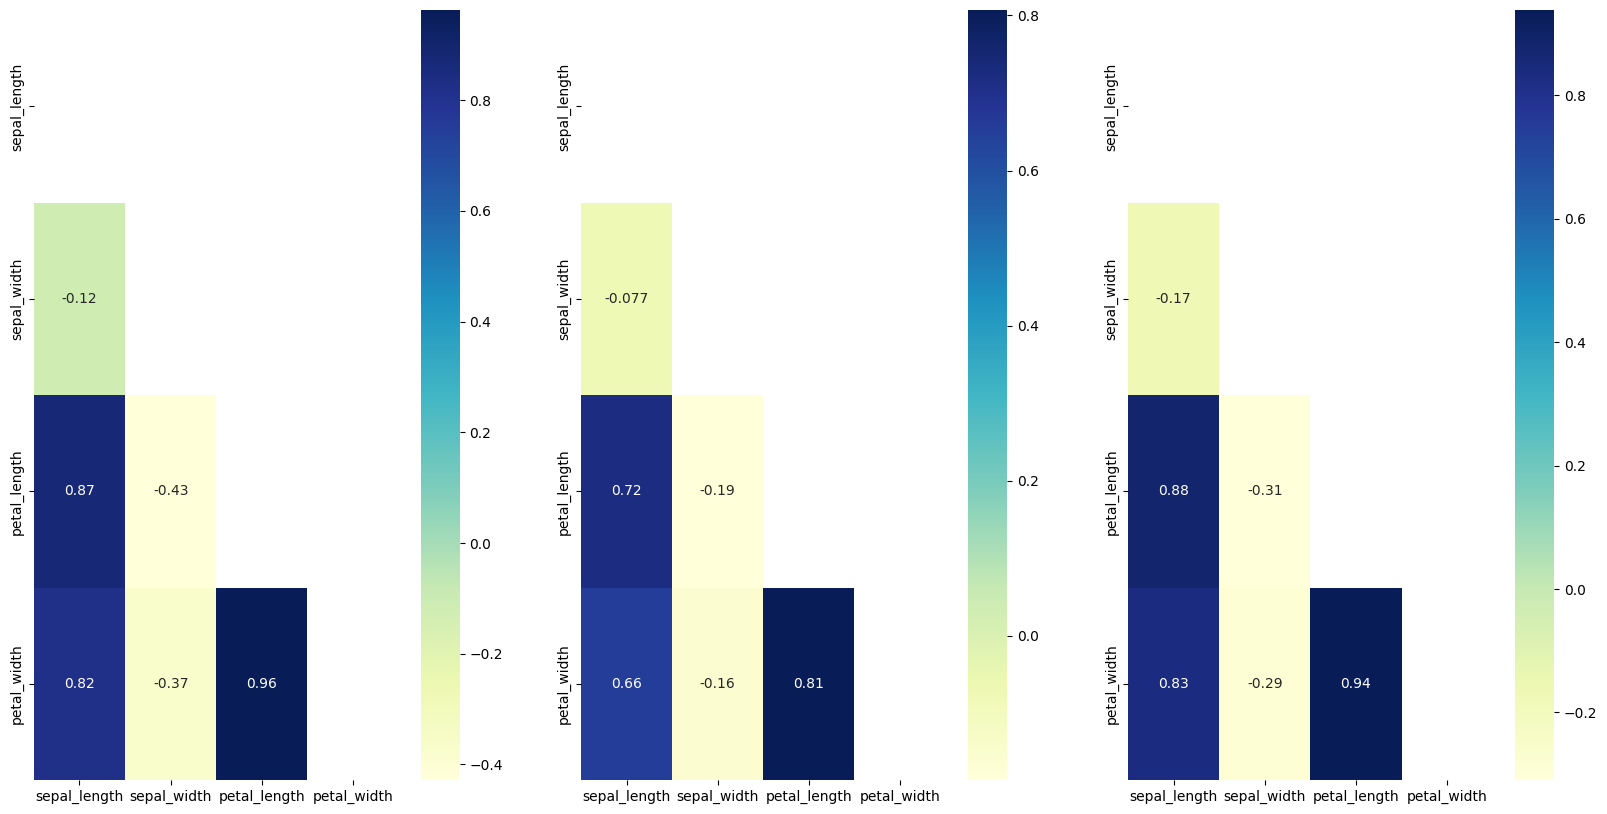

In [250]:
#lấy nửa dưới
mask = np.zeros_like(pearson_method) # tạo ma trận mask như ma trận pearson_method nhưng toàn số 0
mask[np.triu_indices_from(mask)] = True # tạo một danh sách các chỉ số của các ô nửa trên ma trận.
                                        # Kết quả chỉ có nửa dưới = False, chỉ có nửa trên: True
fg, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

sns.heatmap(pearson_method,mask = mask,cmap='YlGnBu',annot=True,ax=ax1) #annot = True: lấy số
sns.heatmap(kendall_method,mask = mask,cmap='YlGnBu',annot=True,ax=ax2)
sns.heatmap(spearman_method,mask = mask,cmap='YlGnBu',annot=True,ax=ax3)